In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info


<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df = df.dropna(subset=['Amount', 'Product_ID', 'Cust_name'])

In [11]:
df['Amount'] = df['Amount'].astype('int')
df['Orders'] = df['Orders'].astype('int')
df['Age'] = df['Age'].astype('int')

C:\Users\mrahm\AppData\Local\Temp\ipykernel_17572\3756378665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['Amount'].astype('int')
C:\Users\mrahm\AppData\Local\Temp\ipykernel_17572\3756378665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Orders'] = df['Orders'].astype('int')
C:\Users\mrahm\AppData\Local\Temp\ipykernel_17572\3756378665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [12]:
df['TotalSpend'] = df['Orders'] * df['Amount']

C:\Users\mrahm\AppData\Local\Temp\ipykernel_17572\977125159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpend'] = df['Orders'] * df['Amount']


In [13]:
df['Amount'].dtypes

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'TotalSpend'],
      dtype='object')

In [15]:
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount,TotalSpend
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,71802
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,71772
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,47824
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,47754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370,1480
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,1101
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213,852
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206,618


In [16]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


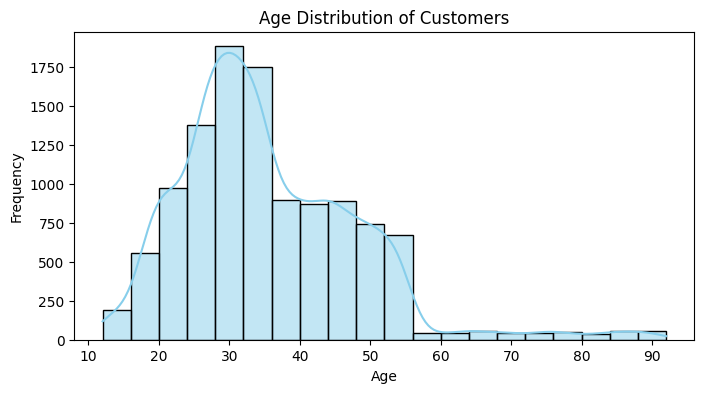

In [17]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("Age Distribution of Customers.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\mrahm\AppData\Local\Temp\ipykernel_17572\56577610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


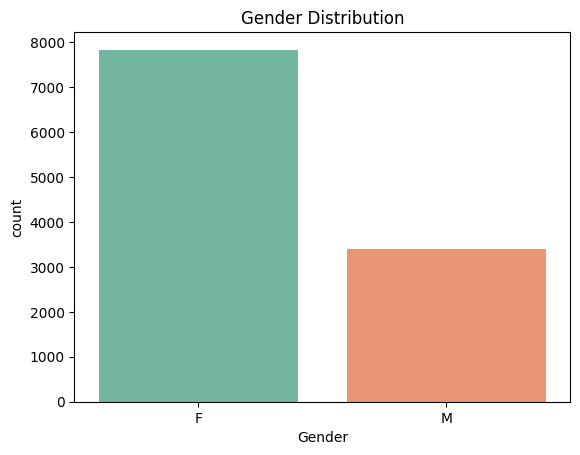

In [18]:
# Gender breakdown
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.savefig("Gender Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

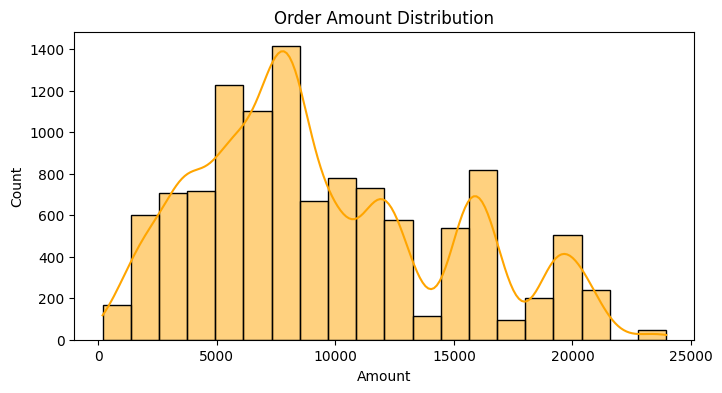

In [19]:
# Amount
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'].dropna(), bins=20, kde=True, color='orange')
plt.title('Order Amount Distribution')
plt.xlabel('Amount')
plt.savefig("Order Amount Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

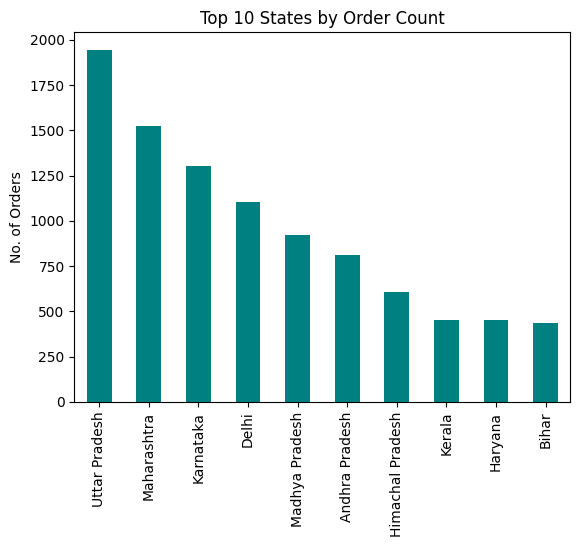

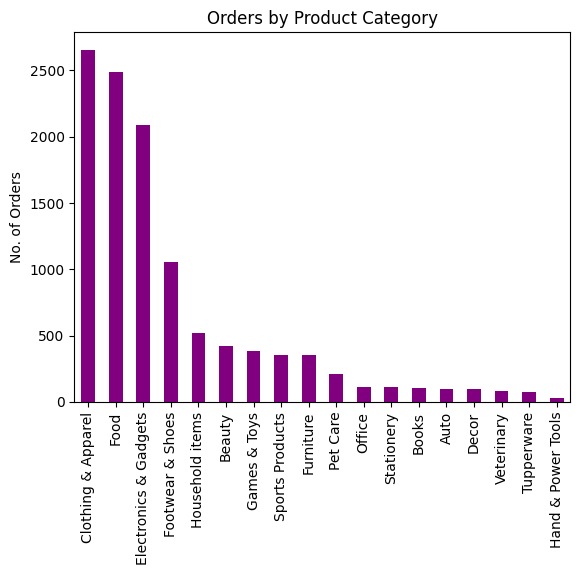

In [20]:
# State distribution
top_states = df['State'].value_counts().head(10)
top_states.plot(kind='bar', color='teal')
plt.title('Top 10 States by Order Count')
plt.ylabel('No. of Orders')
plt.savefig("Top 10 States by Order Count.png", dpi=300, bbox_inches="tight")
plt.show()

# Product category
df['Product_Category'].value_counts().plot(kind='bar', color='purple')
plt.title('Orders by Product Category')
plt.ylabel('No. of Orders')
plt.savefig("Orders by Product Category.png", dpi=300, bbox_inches="tight")
plt.show()

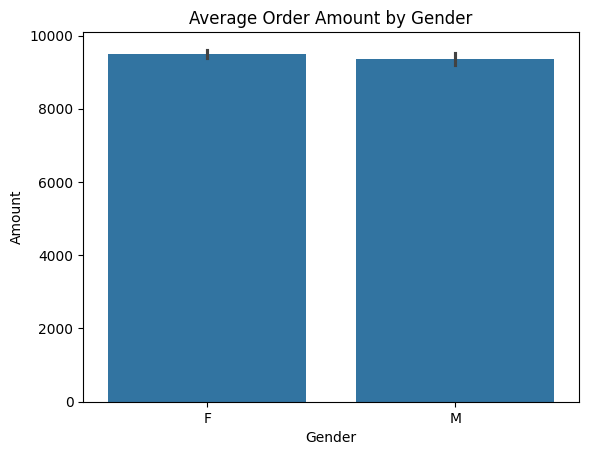

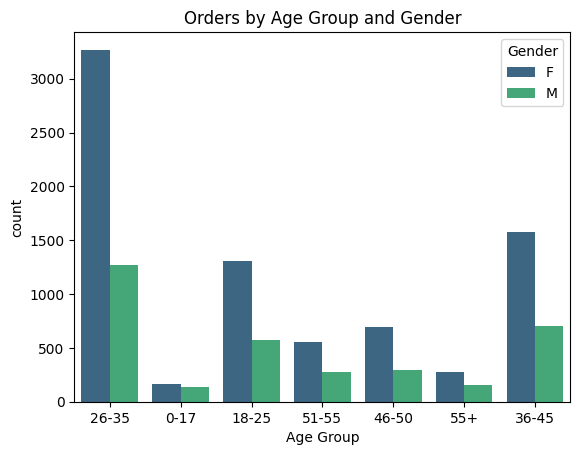

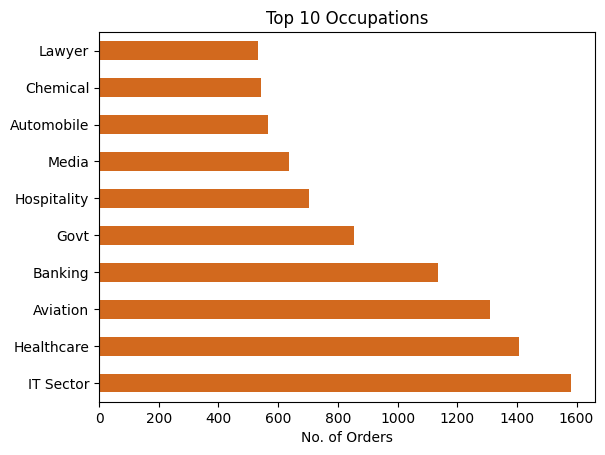

In [21]:
# Avg order amount by Gender
sns.barplot(x='Gender', y='Amount', data=df)
plt.title('Average Order Amount by Gender')
plt.savefig("Average Order Amount by Gender.png", dpi=300, bbox_inches="tight")
plt.show()

# Orders by Age Group and Gender
sns.countplot(x='Age Group', hue='Gender', data=df, palette='viridis')
plt.title('Orders by Age Group and Gender')
plt.savefig("Orders by Age Group and Gender.png", dpi=300, bbox_inches="tight")
plt.show()

# Top Occupations
df['Occupation'].value_counts().head(10).plot(kind='barh', color='chocolate')
plt.title('Top 10 Occupations')
plt.xlabel('No. of Orders')
plt.savefig("Top 10 Occupations.png", dpi=300, bbox_inches="tight")
plt.show()

In [22]:
print("Top customers by spend:")
print(df.groupby('Cust_name')['TotalSpend'].sum().sort_values(ascending=False).head())

print("Top products by revenue:")
print(df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head())

Top customers by spend:
Cust_name
Vishakha     972730
Alejandro    718053
Vasudev      698923
Sudevi       686455
Lalita       683635
Name: TotalSpend, dtype: int32
Top products by revenue:
Product_ID
P00265242    540136
P00110942    424833
P00184942    401816
P00112142    341020
P00059442    338571
Name: Amount, dtype: int32


In [23]:
df.to_csv('Cleaned_Gift_Store_Data.csv', index=False)